In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [34]:
np.random.seed(101)
x = np.random.rand(100,1)-0.5
# np.random.rand(100, 1): This generates a 2D array (matrix) of shape (100, 1) filled with random numbers sampled 
# from a uniform distribution over the range [0, 1).
# - 0.5: This subtracts 0.5 from each of the random values in the array. As a result, the random numbers will now fall in the range [-0.5, 0.5) 
#instead of [0, 1).
y = 3*x[:,0]**2 + 0.05 * np.random.randn(100)
# np.random.randn(100) generates 100 random values from a standard normal distribution (mean of 0 and standard deviation of 1).

In [4]:
df = pd.DataFrame()
df['X'] = x.reshape(100)
df['Y'] =y
df

,X,Y
0,0.016399,-0.051532
1,0.070668,0.079620
2,-0.471526,0.593634
3,-0.328478,0.298989
4,0.185277,0.094856
...,...,...
95,0.342219,0.396232
96,-0.115062,0.056261
97,0.051666,-0.045144
98,0.210538,0.126710


Text(0.5, 1.0, 'X vs Y')

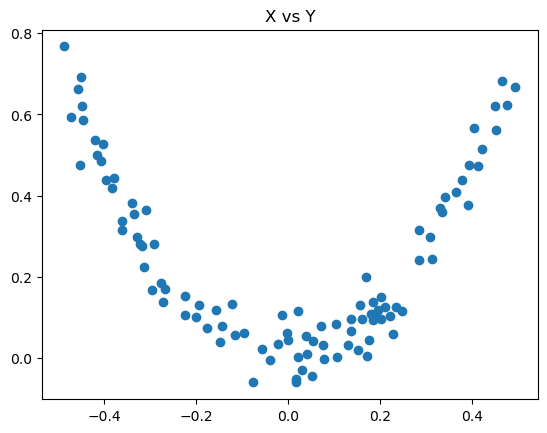

In [7]:
plt.scatter(df['X'],df['Y'])
plt.title("X vs Y")

In [9]:
df['pred1'] = df['Y'].mean()

In [10]:
df.head()

,X,Y,pred1
0,0.016399,-0.051532,0.236808
1,0.070668,0.079620,0.236808
2,-0.471526,0.593634,0.236808
3,-0.328478,0.298989,0.236808
4,0.185277,0.094856,0.236808


In [12]:
df['res1'] = df['Y']-df['pred1']

In [13]:
df.head()

,X,Y,pred1,res1
0,0.016399,-0.051532,0.236808,-0.288340
1,0.070668,0.079620,0.236808,-0.157188
2,-0.471526,0.593634,0.236808,0.356826
3,-0.328478,0.298989,0.236808,0.062181
4,0.185277,0.094856,0.236808,-0.141952


Text(0.5, 1.0, 'X vs Y')

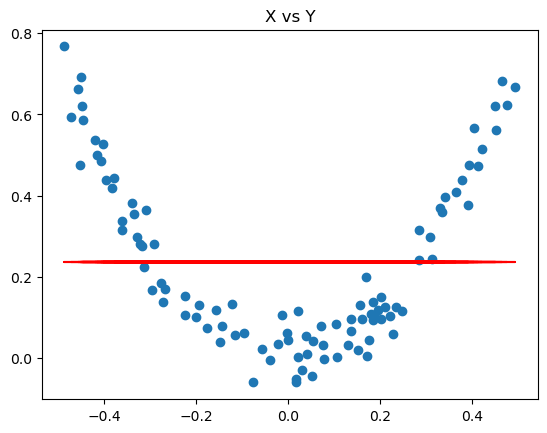

In [35]:
plt.scatter(df['X'],df['Y'])
plt.plot(df['X'],df['pred1'],color = 'red') #lot's of error on taking average value
plt.title("X vs Y")

#  Build DT Model


In [22]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)



DecisionTreeRegressor(max_leaf_nodes=8)

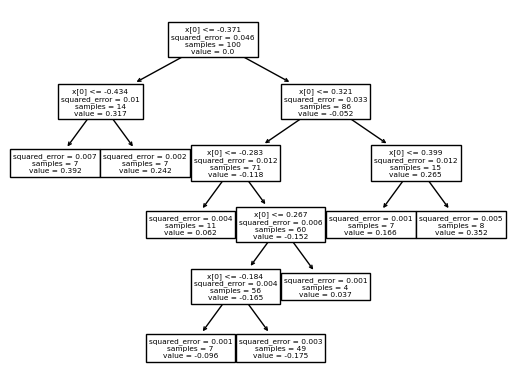

In [23]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [27]:
x_test = np.linspace(-0.5,0.5,500)
x_test 

array([-0.5       , -0.49799599, -0.49599198, -0.49398798, -0.49198397,
       -0.48997996, -0.48797595, -0.48597194, -0.48396794, -0.48196393,
       -0.47995992, -0.47795591, -0.4759519 , -0.4739479 , -0.47194389,
       -0.46993988, -0.46793587, -0.46593186, -0.46392786, -0.46192385,
       -0.45991984, -0.45791583, -0.45591182, -0.45390782, -0.45190381,
       -0.4498998 , -0.44789579, -0.44589178, -0.44388778, -0.44188377,
       -0.43987976, -0.43787575, -0.43587174, -0.43386774, -0.43186373,
       -0.42985972, -0.42785571, -0.4258517 , -0.4238477 , -0.42184369,
       -0.41983968, -0.41783567, -0.41583166, -0.41382766, -0.41182365,
       -0.40981964, -0.40781563, -0.40581162, -0.40380762, -0.40180361,
       -0.3997996 , -0.39779559, -0.39579158, -0.39378758, -0.39178357,
       -0.38977956, -0.38777555, -0.38577154, -0.38376754, -0.38176353,
       -0.37975952, -0.37775551, -0.3757515 , -0.37374749, -0.37174349,
       -0.36973948, -0.36773547, -0.36573146, -0.36372745, -0.36

In [29]:
y_pred =0.2368+tree1.predict(x_test.reshape(500,1))

Text(0.5, 1.0, 'X vs Y')

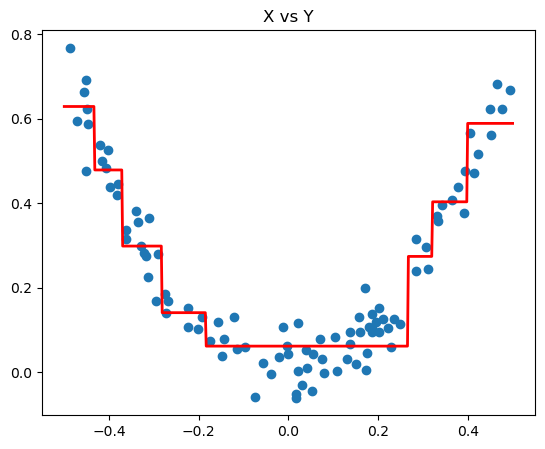

In [38]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test,y_pred,color = 'red',linewidth=2) #lot's of error on taking average value
plt.scatter(df['X'],df['Y'])
plt.title("X vs Y")

In [ ]:
# Key Differences:
# np.random.rand(): Generates numbers in the range [0, 1) (uniformly distributed).
# np.random.randn(): Generates numbers with a mean of 0 and a standard deviation of 1 (normally distributed).
# So, np.random.rand(100, 1) will give non-negative values between 0 and 1, while np.random.randn(100, 1) 
# will give a mix of negative and positive values centered around 0.

In [39]:
df['pred2'] = 0.236 + tree1.predict(df['X'].values.reshape(100,1))
df.head()

,X,Y,pred1,res1,pred2
0,0.016399,-0.051532,0.236808,-0.288340,0.061133
1,0.070668,0.079620,0.236808,-0.157188,0.061133
2,-0.471526,0.593634,0.236808,0.356826,0.627684
3,-0.328478,0.298989,0.236808,0.062181,0.297689
4,0.185277,0.094856,0.236808,-0.141952,0.061133


In [41]:
df['res2'] = df['Y']-df['pred2']

In [42]:
df

,X,Y,pred1,res1,pred2,res2
0,0.016399,-0.051532,0.236808,-0.288340,0.061133,-0.112665
1,0.070668,0.079620,0.236808,-0.157188,0.061133,0.018487
2,-0.471526,0.593634,0.236808,0.356826,0.627684,-0.034050
3,-0.328478,0.298989,0.236808,0.062181,0.297689,0.001301
4,0.185277,0.094856,0.236808,-0.141952,0.061133,0.033723
...,...,...,...,...,...,...
95,0.342219,0.396232,0.236808,0.159424,0.402313,-0.006081
96,-0.115062,0.056261,0.236808,-0.180547,0.061133,-0.004872
97,0.051666,-0.045144,0.236808,-0.281952,0.061133,-0.106277
98,0.210538,0.126710,0.236808,-0.110098,0.061133,0.065577


In [48]:
dtree2 = DecisionTreeRegressor(max_leaf_nodes=8)
dtree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [49]:
y_pred = 0.236 + sum(regressor.predict(x_test.reshape(-1,1)) for regressor in [tree1, dtree2] )

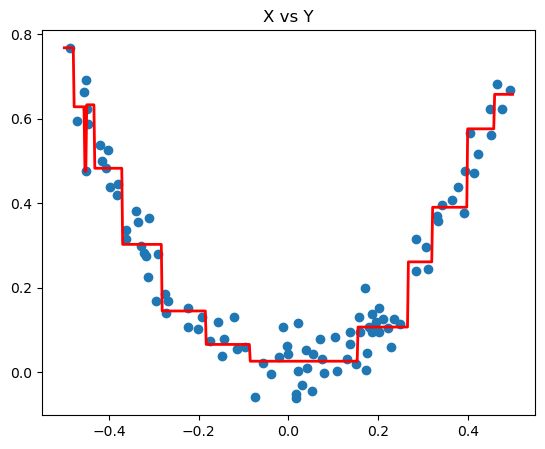

In [51]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['Y'])
plt.title('X vs Y')
plt.show()